In [199]:
# Add Matplotlib inline magic command
%matplotlib inline
# import dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#from sqlalchemy import create_engine
#from config import db_password

In [200]:
# Read in usa covid cases csv
usa_df = pd.read_csv("Resources/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
usa_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,05/04/2020,KY,5245,5245.0,0.0,115,0.0,261,261.0,0.0,8,0.0,05/05/2020 05:25:08 PM,Agree,Agree
1,03/23/2020,NH,101,NaN,NaN,23,NaN,1,NaN,NaN,1,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
2,12/08/2020,OK,205999,171497.0,34502.0,0,0.0,1752,1680.0,72.0,0,0.0,12/09/2020 02:45:40 PM,Agree,Agree
3,10/28/2020,RI,31944,NaN,NaN,499,0.0,1192,NaN,NaN,4,0.0,10/29/2020 02:11:33 PM,Not agree,NaN
4,08/21/2020,MD,103523,NaN,NaN,624,0.0,3685,3546.0,139.0,11,1.0,08/22/2020 02:21:09 PM,NaN,Agree


In [201]:
# Get the count of all columns
usa_df.count()

submission_date    23520
state              23520
tot_cases          23520
conf_cases         10245
prob_cases         10245
new_case           23520
pnew_case          18446
tot_death          23520
conf_death         10751
prob_death         10751
new_death          23520
pnew_death         18348
created_at         23520
consent_cases      19208
consent_deaths     19992
dtype: int64

In [202]:
# Putting all columns to a list
usa_df.columns.tolist()

['submission_date',
 'state',
 'tot_cases',
 'conf_cases',
 'prob_cases',
 'new_case',
 'pnew_case',
 'tot_death',
 'conf_death',
 'prob_death',
 'new_death',
 'pnew_death',
 'created_at',
 'consent_cases',
 'consent_deaths']

In [203]:
# Dropping columns that aren't useful
usa_df.drop(["prob_cases", "prob_death", "pnew_case", "pnew_death", "consent_cases", "consent_deaths", "conf_death", "conf_cases"], axis=1, inplace=True)
usa_df

,submission_date,state,tot_cases,new_case,tot_death,new_death,created_at
0,05/04/2020,KY,5245,115,261,8,05/05/2020 05:25:08 PM
1,03/23/2020,NH,101,23,1,1,03/26/2020 04:22:39 PM
2,12/08/2020,OK,205999,0,1752,0,12/09/2020 02:45:40 PM
3,10/28/2020,RI,31944,499,1192,4,10/29/2020 02:11:33 PM
4,08/21/2020,MD,103523,624,3685,11,08/22/2020 02:21:09 PM
...,...,...,...,...,...,...,...
23515,07/12/2020,DC,10847,46,568,0,07/13/2020 03:19:34 PM
23516,03/05/2020,MI,0,0,0,0,03/26/2020 04:22:39 PM
23517,02/03/2021,CA,3281271,10501,41811,481,02/04/2021 02:53:58 PM
23518,03/31/2020,IA,497,73,7,1,03/30/2020 04:22:39 PM


In [204]:
# drop the columns with NaN
usa_df.dropna(inplace=True)

In [205]:
usa_df.count()

submission_date    23520
state              23520
tot_cases          23520
new_case           23520
tot_death          23520
new_death          23520
created_at         23520
dtype: int64

In [364]:
# Group by submission date
usa_df_grpby = pd.DataFrame(usa_df.groupby(["submission_date"]).sum()[["tot_cases", "new_case", "tot_death", "new_death"]]).reset_index()
usa_df_grpby.count()
usa_df_grpby.to_csv("Resources/usa_df_cleaned.csv")

In [207]:
country_df = pd.read_csv("Resources/country_vaccinations.csv")
country_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [208]:
country_df.count()

country                                3555
iso_code                               3283
date                                   3555
total_vaccinations                     2341
people_vaccinated                      1940
people_fully_vaccinated                1278
daily_vaccinations_raw                 1972
daily_vaccinations                     3420
total_vaccinations_per_hundred         2341
people_vaccinated_per_hundred          1940
people_fully_vaccinated_per_hundred    1278
daily_vaccinations_per_million         3420
vaccines                               3555
source_name                            3555
source_website                         3555
dtype: int64

In [209]:
country_df.drop(["daily_vaccinations_raw", "source_name", "source_website"], axis=1, inplace=True)
country_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech
...,...,...,...,...,...,...,...,...,...,...,...,...
3550,Wales,NaN,2021-02-14,790211.0,784809.0,5402.0,26206.0,25.06,24.89,0.17,8312.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
3551,Wales,NaN,2021-02-15,803178.0,795927.0,7251.0,24418.0,25.47,25.24,0.23,7745.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
3552,Wales,NaN,2021-02-16,820339.0,807351.0,12988.0,23033.0,26.02,25.61,0.41,7305.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
3553,Wales,NaN,2021-02-17,841975.0,822633.0,19342.0,22012.0,26.70,26.09,0.61,6982.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [210]:
country_df.dropna(inplace=True)

In [362]:
country_df.to_csv("Resources/country_cleaned_df.csv")

In [211]:
country_df.count()

country                                1103
iso_code                               1103
date                                   1103
total_vaccinations                     1103
people_vaccinated                      1103
people_fully_vaccinated                1103
daily_vaccinations                     1103
total_vaccinations_per_hundred         1103
people_vaccinated_per_hundred          1103
people_fully_vaccinated_per_hundred    1103
daily_vaccinations_per_million         1103
vaccines                               1103
dtype: int64

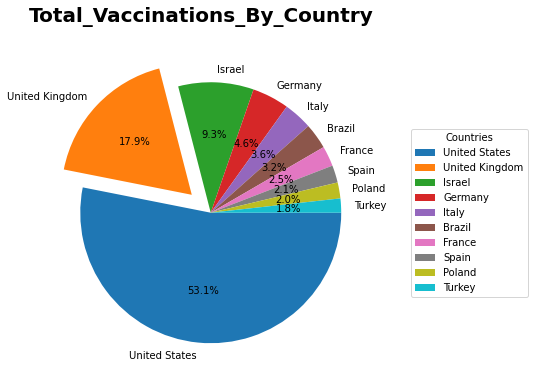

In [303]:
# Pie chart for percentage of total vaccinations for top 10 countries
total_vaccinations_by_country = country_df.groupby("country")["total_vaccinations"].sum()
total_vaccinations_by_country.sort_values(ascending=False, inplace=True)
top_ten_countries = total_vaccinations_by_country.index[0:10]
total_vaccinations = total_vaccinations_by_country.to_list()[0:10]
fig, ax = plt.subplots(figsize=(10,6))
explode_values = (0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0)
ax.pie(total_vaccinations, labels=top_ten_countries, explode=explode_values, counterclock=False,autopct='%.1f%%')
fig.suptitle('Total_Vaccinations_By_Country', fontsize=20, fontweight='bold')
ax.legend(top_ten_countries,
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1.1, 0, 1, 1))
plt.savefig('Resources/Total_Vaccinations_By_Country.png', dpi=100, transparent=False, facecolor="silver")
plt.show()

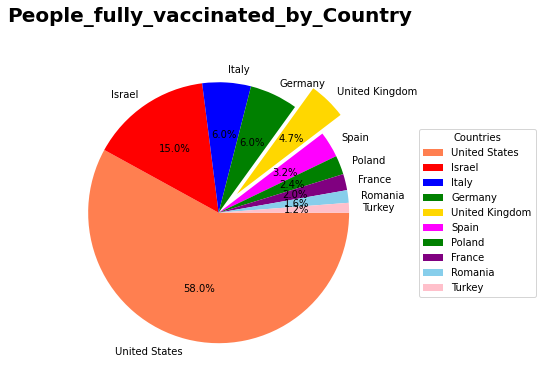

In [305]:
# Pie chart for people fully vaccinated for top 10 countries
ppl_fully_vaccinated_by_country = country_df.groupby("country")["people_fully_vaccinated"].sum()
ppl_fully_vaccinated_by_country.sort_values(ascending=False, inplace=True)
top_countries = ppl_fully_vaccinated_by_country.index[0:10]
ppl_fully_vaccinated = ppl_fully_vaccinated_by_country.to_list()[0:10]
fig, ax = plt.subplots(figsize=(10,6))
explode_values = (0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0)
colors = ['coral', 'red', 'blue', 'green', 'gold', "magenta", "green", "purple", "skyblue","pink"]
ax.pie(ppl_fully_vaccinated, labels=top_countries, explode=explode_values, colors=colors, counterclock=False,autopct='%.1f%%')
ax.legend(top_countries,
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1.1, 0, 1, 1))
fig.suptitle('People_fully_vaccinated_by_Country', fontsize=20, fontweight='bold')
plt.savefig('Resources/People_fully_vaccinated_by_Country.png', dpi=100, transparent=False, facecolor="silver")
plt.show()

In [216]:
total_vaccinations_per_hundred = country_df.groupby("country")["total_vaccinations_per_hundred"].sum()
ppl_fully_vaccinated_per_hundred = country_df.groupby("country")["people_fully_vaccinated_per_hundred"].sum()
ppl_not_vaccinated = total_vaccinations_per_hundred - ppl_fully_vaccinated_per_hundred
countries = ppl_not_vaccinated.index
countries
ppl_fully_vaccinated_per_hundred

country
Albania                   0.06
Argentina                 8.47
Austria                  19.28
Belgium                  24.03
Bermuda                   5.12
Brazil                    1.57
Bulgaria                  6.76
Cayman Islands           50.90
Chile                     3.59
Costa Rica                1.68
Croatia                   7.29
Cyprus                    3.69
Czechia                  25.70
Denmark                  53.63
Ecuador                   0.01
Estonia                  28.07
Faeroe Islands            5.14
Finland                  19.17
France                   12.42
Germany                  29.88
Gibraltar               376.44
Greece                   21.01
Guernsey                  4.61
Hungary                  24.21
Iceland                  20.20
Indonesia                 1.77
Ireland                  21.56
Isle of Man              63.09
Israel                  726.88
Italy                    41.71
Jersey                    9.46
Latvia                   16.43


In [215]:
ppl_not_vaccinated

country
Albania                    0.15
Argentina                 19.41
Austria                   73.29
Belgium                   83.86
Bermuda                   25.55
Brazil                    30.18
Bulgaria                  17.78
Cayman Islands            83.39
Chile                     95.40
Costa Rica                 4.83
Croatia                   12.56
Cyprus                    10.07
Czechia                   76.50
Denmark                  120.55
Ecuador                    0.04
Estonia                   63.06
Faeroe Islands            25.14
Finland                   78.19
France                    66.05
Germany                   86.20
Gibraltar                823.37
Greece                    75.89
Guernsey                  17.96
Hungary                   80.38
Iceland                   44.48
Indonesia                  6.16
Ireland                   43.70
Isle of Man              217.66
Israel                  1566.34
Italy                     83.21
Jersey                    51.68


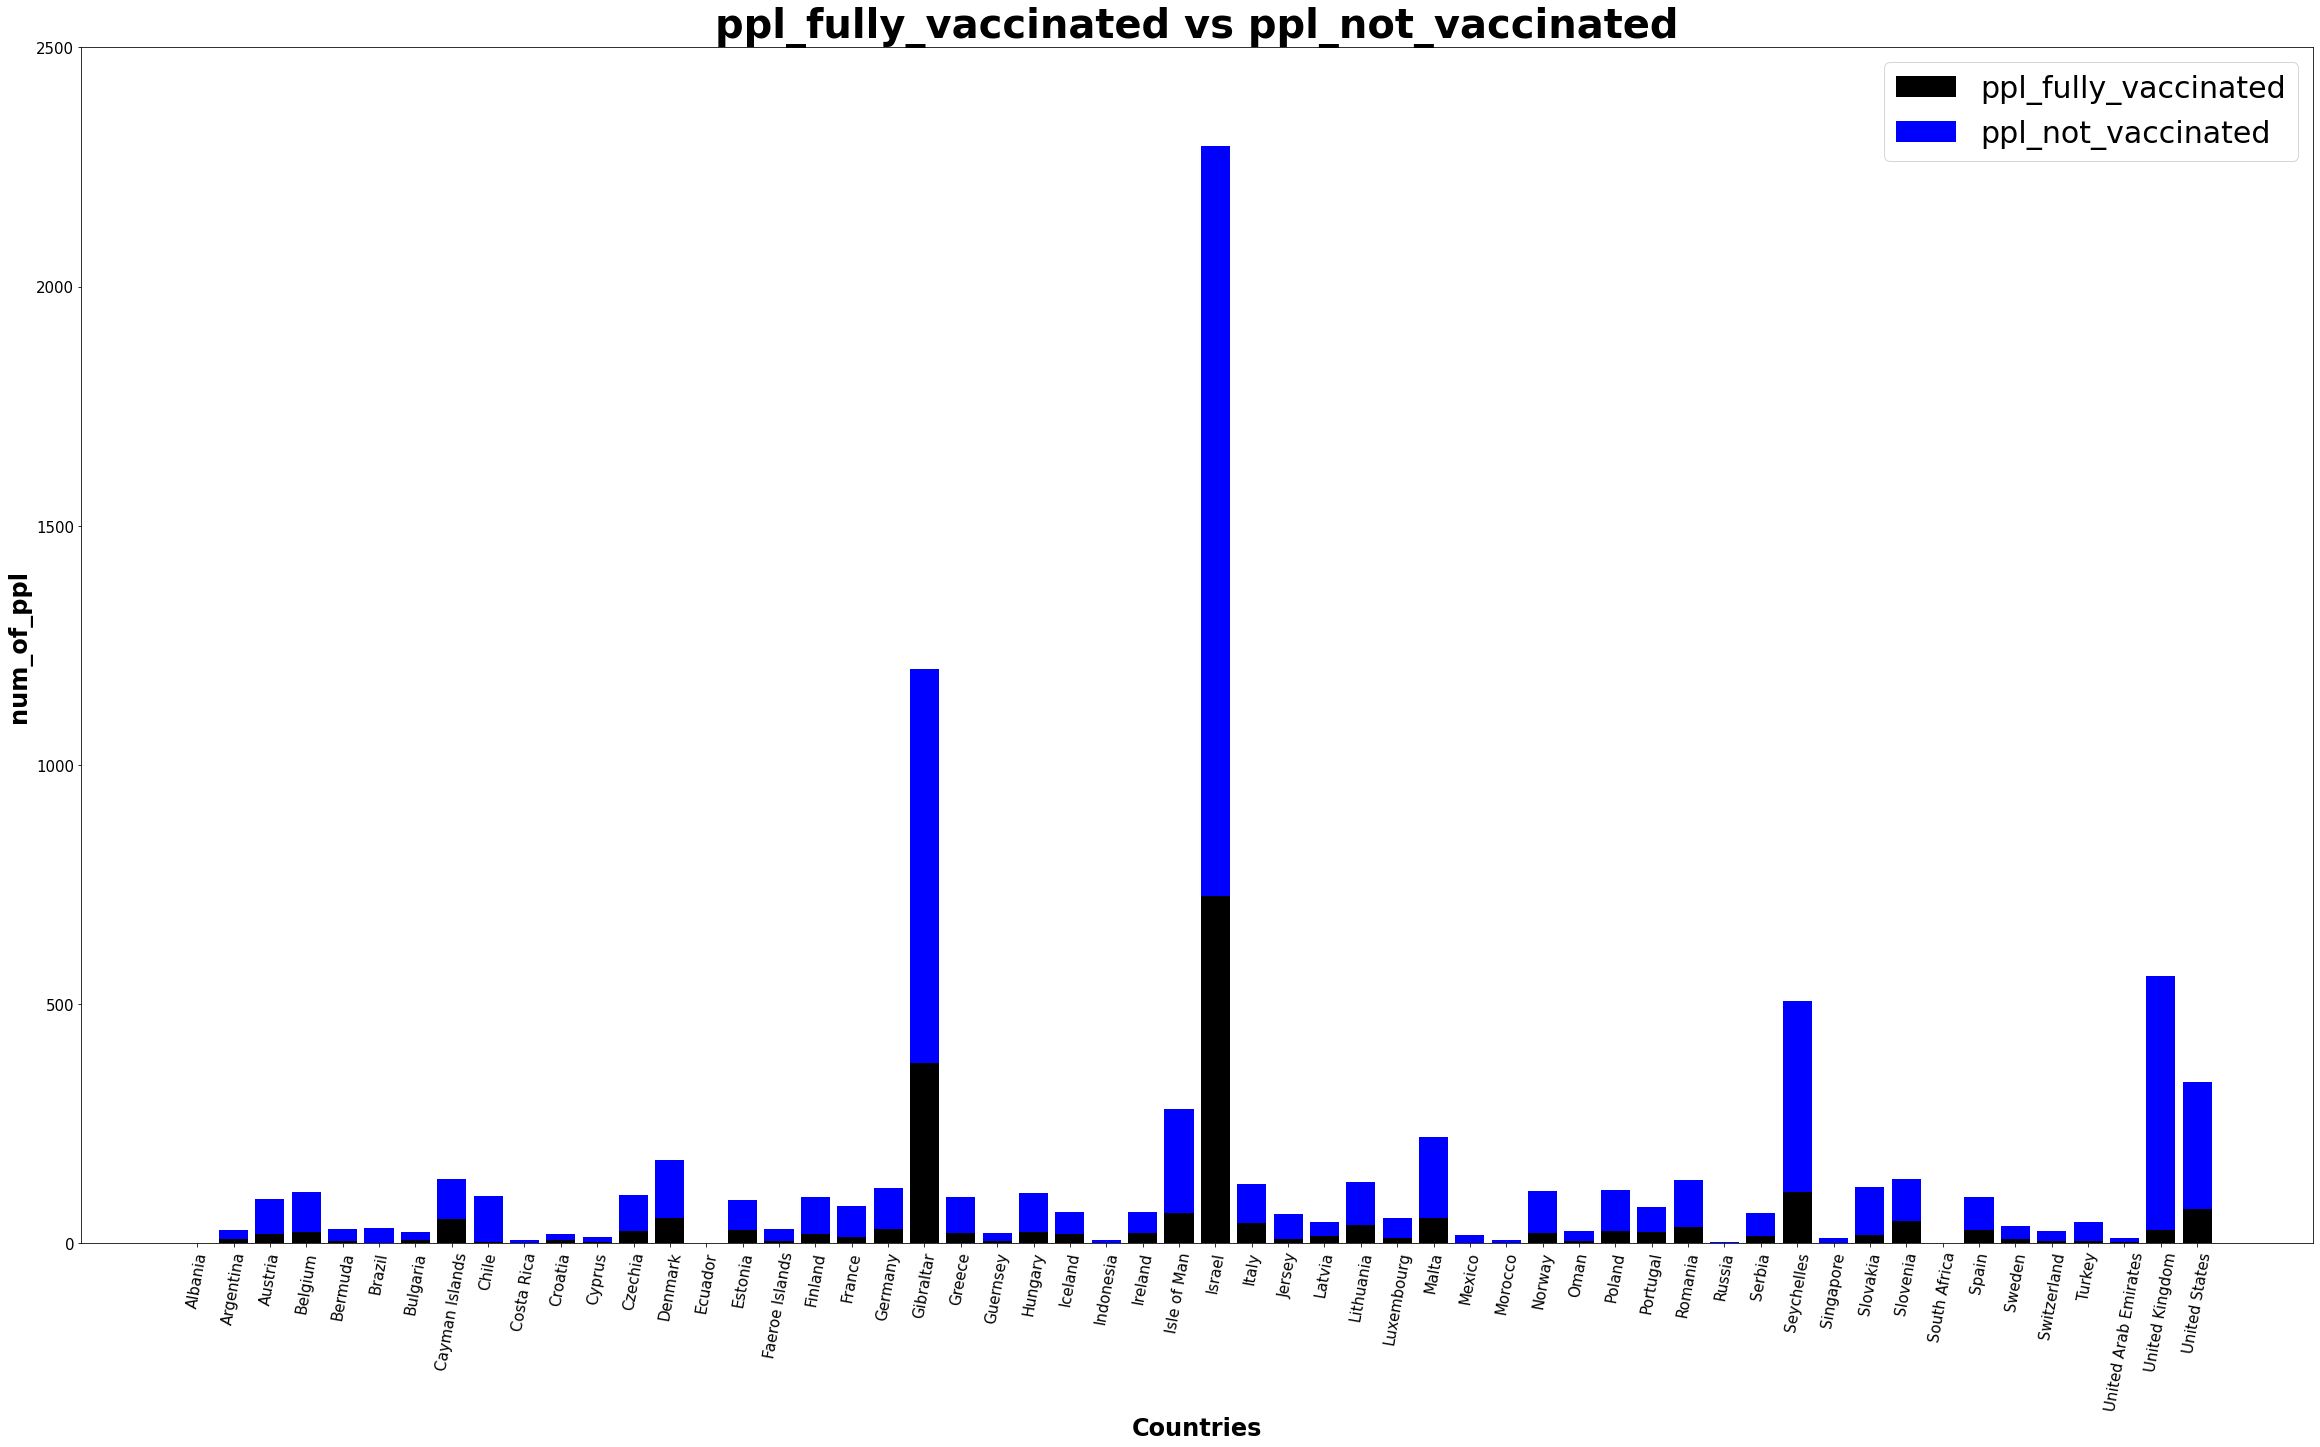

In [344]:
fig, ax = plt.subplots(figsize=(40,22))
ax.bar(countries, ppl_fully_vaccinated_per_hundred, color="black", label='ppl_fully_vaccinated')
ax.bar(countries, ppl_not_vaccinated, bottom=ppl_fully_vaccinated_per_hundred, color='b', label='ppl_not_vaccinated')
ax.set_xlabel('Countries', fontsize=24, fontweight='bold')
ax.set_ylabel('num_of_ppl', fontsize=24, fontweight='bold')
ax.tick_params(axis='x', rotation=80)
ax.tick_params(axis='both', labelsize=15)
ax.set_title('ppl_fully_vaccinated vs ppl_not_vaccinated',fontsize=40,fontweight='bold')
plt.ylim((0,2500))
ax.legend(fontsize=30)
plt.savefig('Resources/ppl_fully_vaccinated vs ppl_not_vaccinated.png', transparent=False, facecolor="orange")
plt.show()

In [337]:
percentage_fully_vaccinated_by_country = ppl_fully_vaccinated_by_country/total_vaccinations_by_country * 100
x = percentage_fully_vaccinated_by_country.index.to_list()
y = percentage_fully_vaccinated_by_country.to_list()

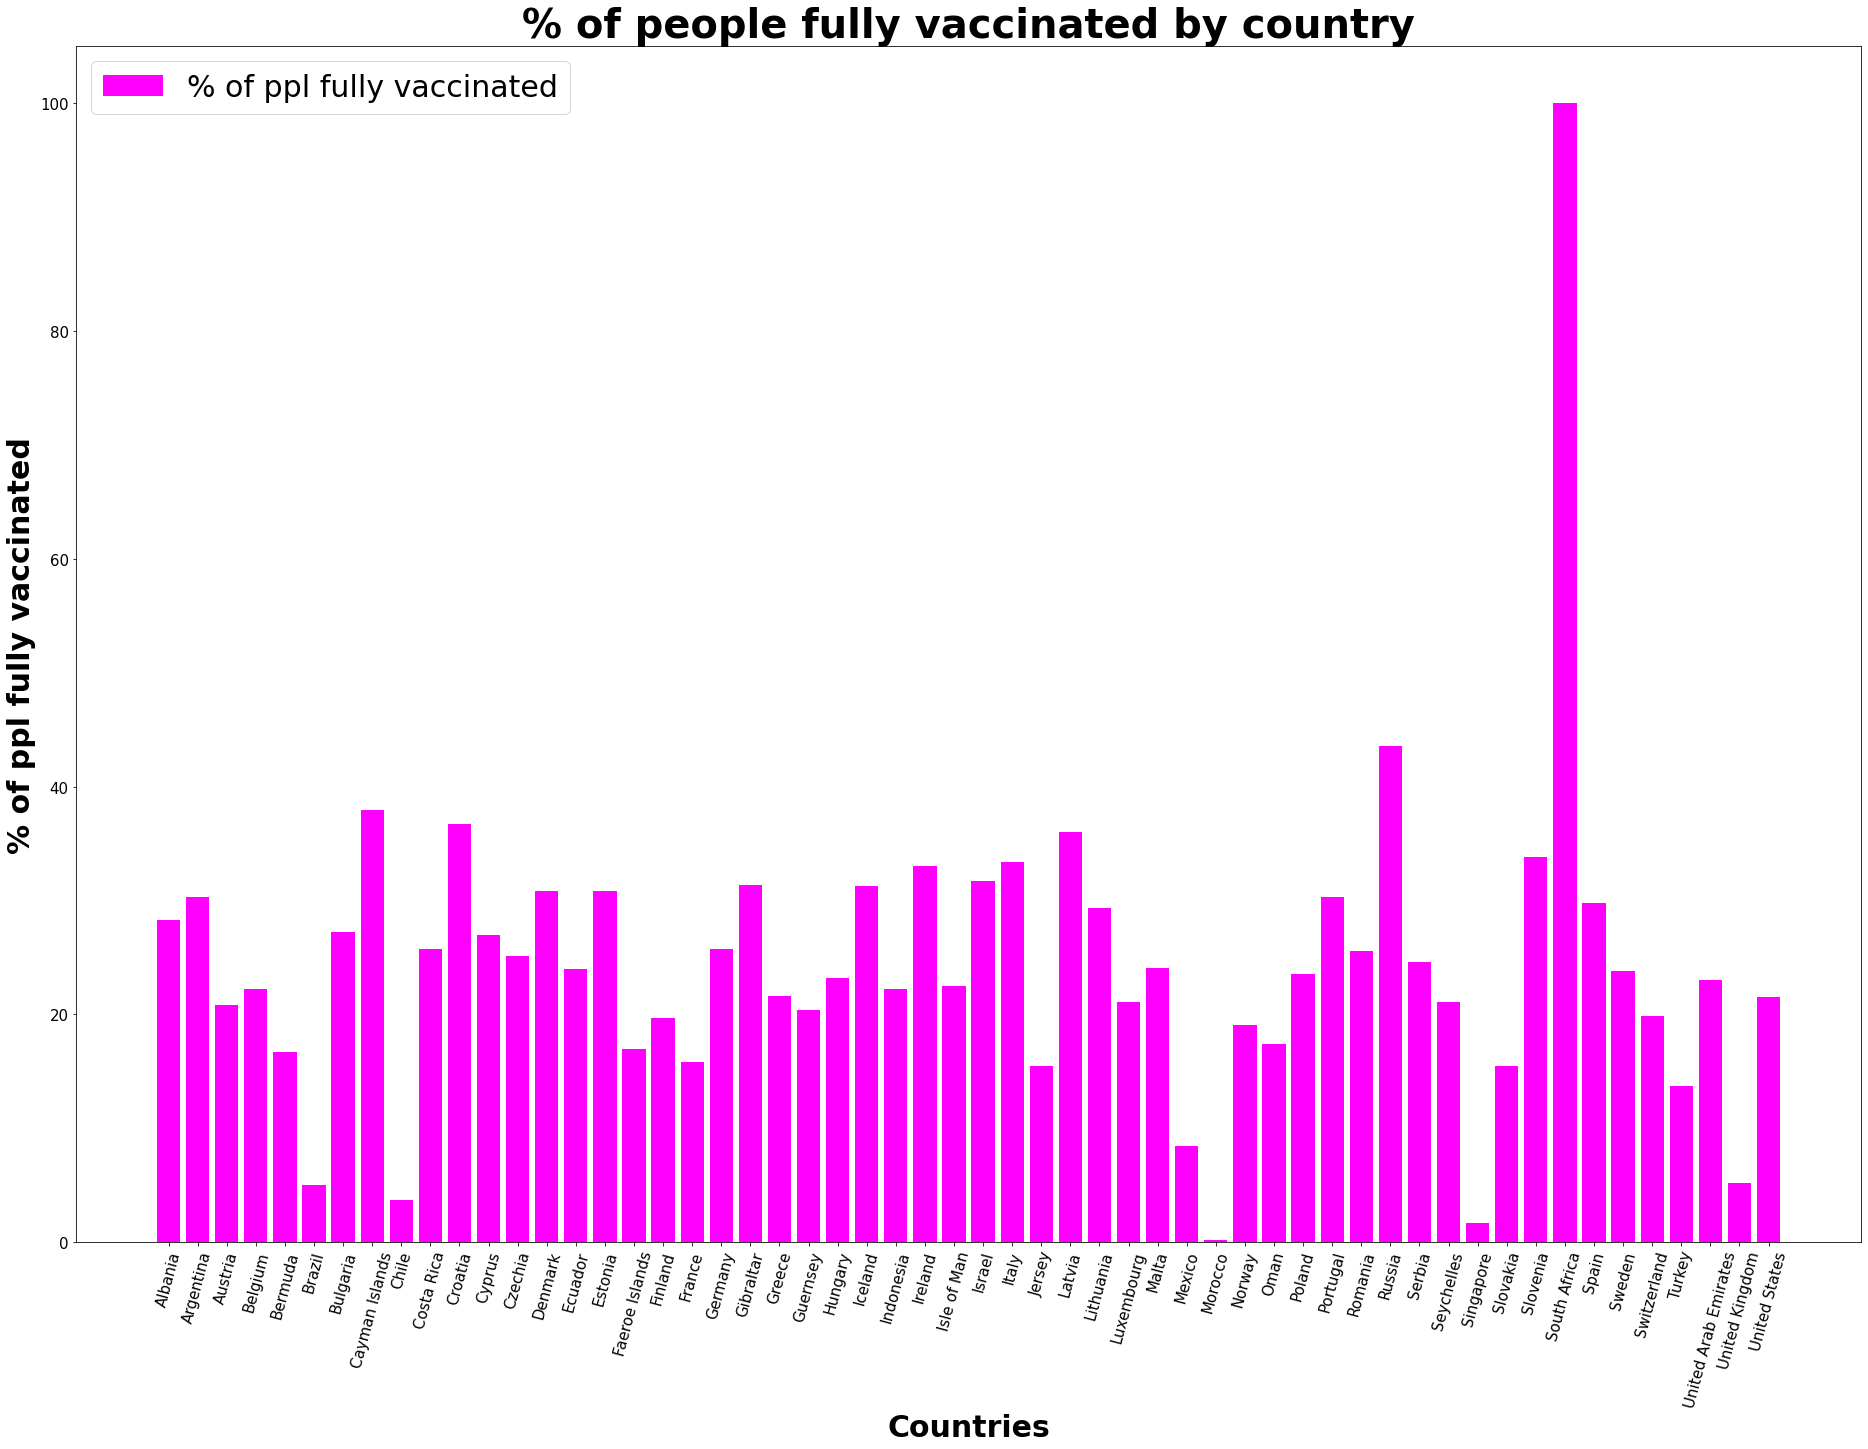

In [360]:
fig, ax = plt.subplots(figsize=(32,22)) 
ax.bar(x,y, color="magenta", label="% of ppl fully vaccinated")
ax.tick_params(axis='x', rotation=75)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Countries', fontsize=30, fontweight='bold')
plt.ylabel('% of ppl fully vaccinated', fontsize=30, fontweight='bold')
plt.title("% of people fully vaccinated by country", fontsize=40, fontweight='bold')
ax.legend(fontsize=30)
plt.savefig('Resources/%_of_people_fully_vaccinated_by_country.png', transparent=False, facecolor="skyblue")
plt.show()

In [138]:
# Apply filter on country dataframe to get only USA data
country_df = country_df[country_df["country"]=="United States"]
country_df.head(30)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
3450,United States,USA,2021-01-14,11148991.0,9690757.0,1342086.0,747082.0,3.33,2.90,0.40,2234.0,"Moderna, Pfizer/BioNTech"
3451,United States,USA,2021-01-15,12279180.0,10595866.0,1610524.0,798707.0,3.67,3.17,0.48,2388.0,"Moderna, Pfizer/BioNTech"
3455,United States,USA,2021-01-19,15707588.0,13595803.0,2023124.0,911493.0,4.70,4.07,0.60,2725.0,"Moderna, Pfizer/BioNTech"
3456,United States,USA,2021-01-20,16525281.0,14270441.0,2161419.0,892403.0,4.94,4.27,0.65,2668.0,"Moderna, Pfizer/BioNTech"
3457,United States,USA,2021-01-21,17546374.0,15053257.0,2394961.0,913912.0,5.25,4.50,0.72,2733.0,"Moderna, Pfizer/BioNTech"
3458,United States,USA,2021-01-22,19107959.0,16243093.0,2756953.0,975540.0,5.71,4.86,0.82,2917.0,"Moderna, Pfizer/BioNTech"
3459,United States,USA,2021-01-23,20537990.0,17390345.0,3027865.0,1057387.0,6.14,5.20,0.91,3162.0,"Moderna, Pfizer/BioNTech"
3460,United States,USA,2021-01-24,21848655.0,18502131.0,3216836.0,1122182.0,6.53,5.53,0.96,3355.0,"Moderna, Pfizer/BioNTech"
3461,United States,USA,2021-01-25,22734243.0,19252279.0,3346390.0,1126251.0,6.80,5.76,1.00,3368.0,"Moderna, Pfizer/BioNTech"
3462,United States,USA,2021-01-26,23540994.0,19902237.0,3481921.0,1119058.0,7.04,5.95,1.04,3346.0,"Moderna, Pfizer/BioNTech"


In [139]:
# Before merging the data 
# Rename submission_date to "date" in usa data
usa_df_grpby.rename(columns={'submission_date': 'date'}, inplace=True)
# change the date column to match '%Y-%m-%d'
usa_df_grpby["date"] = pd.to_datetime(usa_df_grpby["date"]).dt.strftime('%Y-%m-%d')

In [140]:
# Merge both the dataframes on date
merged_df = pd.merge(usa_df_grpby, country_df, on = ["date"], how='outer')
merged_df.dropna(inplace=True)
merged_df

,date,tot_cases,new_case,tot_death,new_death,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
13,2021-01-14,23214965.0,228133.0,387819.0,3950.0,United States,USA,11148991.0,9690757.0,1342086.0,747082.0,3.33,2.90,0.40,2234.0,"Moderna, Pfizer/BioNTech"
14,2021-01-15,23462882.0,247917.0,391470.0,3651.0,United States,USA,12279180.0,10595866.0,1610524.0,798707.0,3.67,3.17,0.48,2388.0,"Moderna, Pfizer/BioNTech"
18,2021-01-19,24154192.0,148915.0,400891.0,2334.0,United States,USA,15707588.0,13595803.0,2023124.0,911493.0,4.70,4.07,0.60,2725.0,"Moderna, Pfizer/BioNTech"
19,2021-01-20,24341199.0,187007.0,405278.0,4387.0,United States,USA,16525281.0,14270441.0,2161419.0,892403.0,4.94,4.27,0.65,2668.0,"Moderna, Pfizer/BioNTech"
20,2021-01-21,24529591.0,188392.0,409289.0,4011.0,United States,USA,17546374.0,15053257.0,2394961.0,913912.0,5.25,4.50,0.72,2733.0,"Moderna, Pfizer/BioNTech"
22,2021-01-22,24720931.0,191340.0,413226.0,3937.0,United States,USA,19107959.0,16243093.0,2756953.0,975540.0,5.71,4.86,0.82,2917.0,"Moderna, Pfizer/BioNTech"
24,2021-01-23,24891373.0,170442.0,416627.0,3401.0,United States,USA,20537990.0,17390345.0,3027865.0,1057387.0,6.14,5.20,0.91,3162.0,"Moderna, Pfizer/BioNTech"
26,2021-01-24,25031373.0,140000.0,418545.0,1918.0,United States,USA,21848655.0,18502131.0,3216836.0,1122182.0,6.53,5.53,0.96,3355.0,"Moderna, Pfizer/BioNTech"
28,2021-01-25,25165652.0,134279.0,420492.0,1947.0,United States,USA,22734243.0,19252279.0,3346390.0,1126251.0,6.80,5.76,1.00,3368.0,"Moderna, Pfizer/BioNTech"
30,2021-01-26,25316100.0,150448.0,424215.0,3723.0,United States,USA,23540994.0,19902237.0,3481921.0,1119058.0,7.04,5.95,1.04,3346.0,"Moderna, Pfizer/BioNTech"


In [42]:
# Read merged dataframe to csv
merged_df.to_csv('Resources/total_cases_vaccinations_data_for_usa.csv', index=False) 

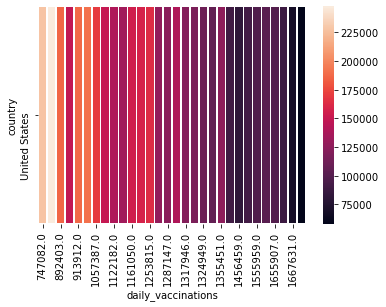

In [181]:
import seaborn as sns
test = merged_df.pivot("country", "daily_vaccinations", "new_case")
ax = sns.heatmap(test, linewidths=0.5)